<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

<br><br>
## <strong>1 금융 시계열 데이터 결측치 처리 / 보간법
https://github.com/pydata/pandas-datareader
1. pandas를 활용한 데이터 정렬 및 보간법
1. 금융데이터 크롤링 모듈 설치방법 (2018.06 기준)
1. ! pip install git+https://github.com/pydata/pandas-datareader.git --upgrade


In [1]:
from pandas_datareader import get_data_yahoo
start_date = '2013-01-01'
codes = ['GM', 'KO', '005930.KS', '000660.KS']
result = {}
for code in codes:
    result[code] = get_data_yahoo(code, start_date).Close

In [3]:
import pandas as pd
prices = pd.DataFrame(result)
prices.head(3)

,GM,KO,005930.KS,000660.KS
Date,,,,
2012-12-31,28.830000,36.250000,NaN,NaN
2013-01-02,29.129999,37.599998,31520.0,26600.0
2013-01-03,29.820000,37.599998,30860.0,26650.0


In [4]:
print(prices.isnull().sum())

GM           41
KO           41
005930.KS    74
000660.KS    74
dtype: int64


In [6]:
prices = prices.fillna(method='ffill')
prices = prices.dropna()                
prices.to_csv('./data/stock.csv', encoding="ms949")
prices.tail(3)

,GM,KO,005930.KS,000660.KS
Date,,,,
2018-06-01,43.200001,43.119999,51300.0,91400.0
2018-06-04,43.779999,43.490002,51100.0,89800.0
2018-06-05,43.779999,43.490002,51300.0,91000.0


<br><br>
## **2 금융 시계열 데이터 전처리**
데이터 분석을 위한 전처리 방법

<br>
### **01 가격 차이가 큰 시계열 데이터 비교하기**
데이터 정규화 / 비정규화

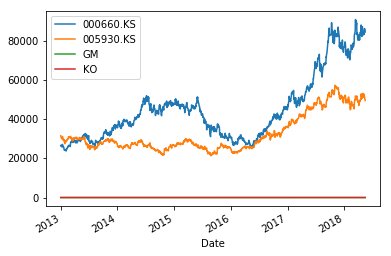

In [5]:
%matplotlib inline
prices.plot()

In [6]:
price = prices['005930.KS']
price[-5:]

Date
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
2018-05-14    50100.0
2018-05-15    49400.0
Name: 005930.KS, dtype: float64

In [7]:
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-07',
               '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11',
               '2018-05-14', '2018-05-15'],
              dtype='datetime64[ns]', name='Date', length=1391, freq=None)

In [8]:
price.index = pd.DatetimeIndex(price.index)
price.index

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-07',
               '2018-05-08', '2018-05-09', '2018-05-10', '2018-05-11',
               '2018-05-14', '2018-05-15'],
              dtype='datetime64[ns]', name='Date', length=1391, freq=None)

In [9]:
price["2013-10-03"] / price["2013-08-01"] -1

0.10781250000000009

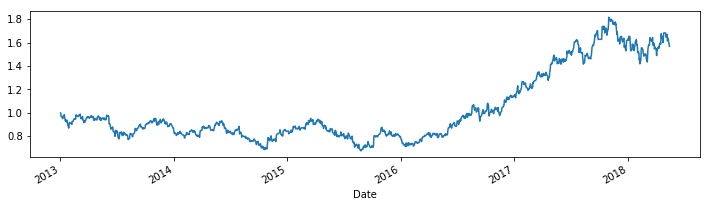

In [10]:
returns      = price.pct_change()
ret_price    = (1 + returns).cumprod()
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

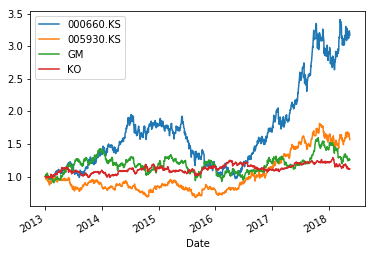

In [11]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod()
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

<br>
### **02 누적 수익률 계산 **
.pct_change().cumprod()

In [12]:
month_returns = price.resample('BM').last().pct_change()
month_returns['2016']

Date
2016-01-29   -0.087302
2016-02-29    0.024348
2016-03-31    0.113752
2016-04-29   -0.051067
2016-05-31    0.037751
2016-06-30    0.102941
2016-07-29    0.080000
2016-08-31    0.052632
2016-09-30   -0.013580
2016-10-31    0.025657
2016-11-30    0.065284
2016-12-30    0.032073
Freq: BM, Name: 005930.KS, dtype: float64

In [13]:
m_ret = (1 + month_returns).cumprod()
m_ret['2016']

Date
2016-01-29    0.794199
2016-02-29    0.813536
2016-03-31    0.906077
2016-04-29    0.859807
2016-05-31    0.892265
2016-06-30    0.984116
2016-07-29    1.062845
2016-08-31    1.118785
2016-09-30    1.103591
2016-10-31    1.131906
2016-11-30    1.205801
2016-12-30    1.244475
Freq: BM, Name: 005930.KS, dtype: float64

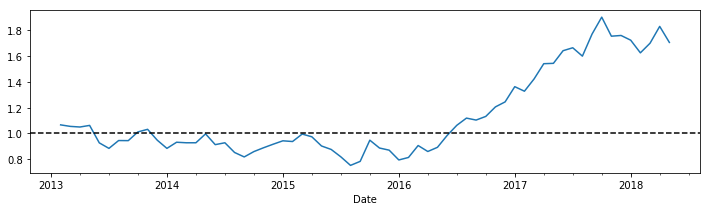

In [14]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **03 중간 배당데이터 추가하기**
재귀적 연산

In [15]:
month_returns['2016-03-31'] += 0.003

In [16]:
for i in range(4):
    i += 10000
    print(i)

10000
10001
10002
10003


<br><br>
## **3 금융데이터  분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 Introduction**

In [17]:
prices.head(3)

,000660.KS,005930.KS,GM,KO
Date,,,,
2013-01-02,26600.0,31520.0,29.129999,37.599998
2013-01-03,26650.0,30860.0,29.820000,37.599998
2013-01-04,26350.0,30500.0,29.860001,37.660000


In [18]:
prices.describe()

,000660.KS,005930.KS,GM,KO
count,1391.000000,1391.000000,1391.000000,1391.000000
mean,44954.133717,32393.242272,34.620733,42.090525
std,16740.771725,9437.793993,3.832410,2.420989
min,23700.000000,21340.000000,26.330000,36.840000
25%,31575.000000,25830.000000,31.730000,40.490002
50%,41350.000000,28500.000000,34.630001,41.970001
75%,49400.000000,36950.000000,36.699999,43.810000
max,90700.000000,57220.000000,46.480000,48.529999


In [19]:
prices.describe().loc[ ['mean', 'std'] ,:]

,000660.KS,005930.KS,GM,KO
mean,44954.133717,32393.242272,34.620733,42.090525
std,16740.771725,9437.793993,3.832410,2.420989


In [20]:
prices.agg(['mean', 'std'])

,000660.KS,005930.KS,GM,KO
mean,44954.133717,32393.242272,34.620733,42.090525
std,16740.771725,9437.793993,3.832410,2.420989


<br>
### **02 주가간의 상관계수 분석**

In [21]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,000660.KS,005930.KS,GM,KO
000660.KS,1.000000,0.341245,0.108684,0.039834
005930.KS,0.341245,1.000000,0.076782,0.045611
GM,0.108684,0.076782,1.000000,0.267551
KO,0.039834,0.045611,0.267551,1.000000


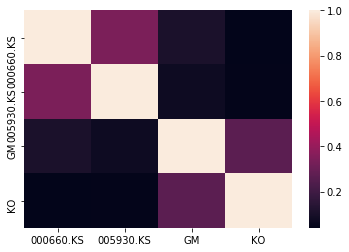

In [22]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)